In [1]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [3]:
RESULTS_DIR2 = '/n/regal/pfister_lab/PERCEPTION/RESULTS_FROM_SCRATCH/'

In [4]:
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/RESULTS/'

In [5]:
for subdir, _, _ in os.walk(RESULTS_DIR):
    if len(subdir.split('/')) == 9:
      if len(os.listdir(subdir)) != 8:#24:
#         print subdir
        #check which ones are really missing
        missing = []
        for i in range(1,5):#13):
            if not os.path.exists(subdir + '/' + str(i).zfill(2) + '_noise.p'):
                missing.append(i)
        
#         print subdir, len(os.listdir(subdir))
    
        

        classifier = subdir.split('/')[-1]
        dataset = subdir.split('/')[-2]
        experiment = subdir.split('/')[-3]
        
        if experiment.startswith('OLD'):
            continue
        
        print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch', missing, len(os.listdir(subdir))
        
#         with open('../SLURMS/Figure1/'+experiment + '_' + str(dataset) + '_' + classifier +'_True.sbatch', 'r') as f:
            
#             old_content = f.read()
# #             print old_content.split('--array=')[0]
#             old_job_array = old_content.split('--array=')[1].split('\n')[0]
    
#             new_slurm = old_content.replace(old_job_array, ','.join([str(m) for m in missing]))
    
#         with open('../SLURMS/Figure1/'+experiment + '_' + str(dataset) + '_' + classifier +'_True.sbatch', 'w') as f:
#             f.write(new_slurm)
    
#             break

sbatch C.Figure1.angle_2_MLP_True.sbatch [] 24
sbatch C.Figure1.angle_2_LeNet_True.sbatch [] 24
sbatch C.Figure1.angle_2_XCEPTION_True.sbatch [] 24
sbatch C.Figure1.angle_2_VGG19_True.sbatch [] 24
sbatch C.Figure1.angle_1_MLP_True.sbatch [] 24
sbatch C.Figure1.angle_1_LeNet_True.sbatch [] 24
sbatch C.Figure1.angle_1_XCEPTION_True.sbatch [] 24
sbatch C.Figure1.angle_1_VGG19_True.sbatch [] 24
sbatch C.Figure1.angle_0_MLP_True.sbatch [] 24
sbatch C.Figure1.angle_0_LeNet_True.sbatch [] 24
sbatch C.Figure1.angle_0_XCEPTION_True.sbatch [] 24
sbatch C.Figure1.angle_0_VGG19_True.sbatch [] 24
sbatch C.Figure1.position_non_aligned_scale_2_MLP_True.sbatch [] 24
sbatch C.Figure1.position_non_aligned_scale_2_LeNet_True.sbatch [] 24
sbatch C.Figure1.position_non_aligned_scale_2_XCEPTION_True.sbatch [] 24
sbatch C.Figure1.position_non_aligned_scale_2_VGG19_True.sbatch [] 24
sbatch C.Figure1.position_non_aligned_scale_1_MLP_True.sbatch [] 24
sbatch C.Figure1.position_non_aligned_scale_1_LeNet_True.sba

In [6]:
for subdir, _, _ in os.walk(RESULTS_DIR2):
    if len(subdir.split('/')) == 9:
      if len(os.listdir(subdir)) != 8:#24:
#         print subdir
        #check which ones are really missing
        missing = []
        for i in range(1,5):#13):
            if not os.path.exists(subdir + '/' + str(i).zfill(2) + '_noise.p'):
                missing.append(i)
        
#         print subdir, len(os.listdir(subdir))
    
        

        classifier = subdir.split('/')[-1]
        dataset = subdir.split('/')[-2]
        experiment = subdir.split('/')[-3]
        
        if experiment.startswith('OLD'):
            continue
        
        print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch', missing, len(os.listdir(subdir))
        
#         with open('../SLURMS/Figure1/'+experiment + '_' + str(dataset) + '_' + classifier +'_True.sbatch', 'r') as f:
            
#             old_content = f.read()
# #             print old_content.split('--array=')[0]
#             old_job_array = old_content.split('--array=')[1].split('\n')[0]
    
#             new_slurm = old_content.replace(old_job_array, ','.join([str(m) for m in missing]))
    
#         with open('../SLURMS/Figure1/'+experiment + '_' + str(dataset) + '_' + classifier +'_True.sbatch', 'w') as f:
#             f.write(new_slurm)
    
#             break

In [7]:
import glob
import cPickle as pickle

In [8]:
experiments = ['C.Figure1.position_common_scale', \
               'C.Figure1.position_non_aligned_scale', \
               'C.Figure1.length', \
               'C.Figure1.direction', \
               'C.Figure1.angle', \
               'C.Figure1.area', \
               'C.Figure1.volume', \
               'C.Figure1.curvature', \
               'C.Figure1.shading']
all_labels = {'C.Figure1.position_common_scale': ['Position Y', '+ Position X', '+ Spotsize'], \
              'C.Figure1.position_non_aligned_scale': ['Position Y', '+ Position X', '+ Spotsize'],\
              'C.Figure1.length': ['Length', '+ Position Y', '+ Position X', '+ Width'], \
              'C.Figure1.direction': ['Direction', '+ Position Y', '+ Position X'], \
              'C.Figure1.angle': ['Angle', '+ Position Y', '+ Position X'], \
              'C.Figure1.area': ['Area', '+ Position Y', '+ Position X'], \
              'C.Figure1.volume': ['Volume', '+ Position Y', '+ Position X'], \
              'C.Figure1.curvature': ['Curvature', '+ Position Y', '+ Position X'], \
              'C.Figure1.shading': ['Shading', '+ Position Y', '+ Position X']
              }

presets = {
 'C.Figure1.position_common_scale': 40, \
 'C.Figure1.position_non_aligned_scale': 10, \
 'C.Figure1.length': 35, \
 'C.Figure1.direction': 215, \
 'C.Figure1.angle': 60, \
 'C.Figure1.area': 20, \
 'C.Figure1.volume': 18, \
 'C.Figure1.curvature': 50, \
 'C.Figure1.shading': 80
}

In [19]:
all_results = {}

for experiment in experiments:

    e_dir = os.path.join(RESULTS_DIR, experiment)
    datasets = sorted(os.listdir(e_dir))
#     print datasets
    results = [None]*4
    
    e_dir2 = os.path.join(RESULTS_DIR2, experiment)

    classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
    for i,c in enumerate(classifiers):

        results[i] = []
        for d in datasets:
            d_dir = os.path.join(e_dir, d)

#             stats_files = ['01_noise.p', '02_noise.p', '03_noise.p', '04_noise.p']#glob.glob(os.path.join(d_dir, c)+'/*.p')
            stats_files = glob.glob(os.path.join(d_dir, c)+'/*.p')
#             print stats_files
#             break
            MLAEs = []

            for s in stats_files:
#                 stats_file = os.path.join(d_dir, c)+'/'+s
                stats_file = s
#                 print s
                if os.path.exists(stats_file):
                    with open(stats_file, 'r') as f:
                        stats = pickle.load(f)
                    MLAEs.append(stats['MLAE'])

            results[i].append(MLAEs)
            
            
    results2 = [None]*2
    classifiers2 = ['VGG19', 'XCEPTION']
    for i,c in enumerate(classifiers2):

        results2[i] = []
        for d in datasets:
            d_dir = os.path.join(e_dir2, d)

#             stats_files = ['01_noise.p', '02_noise.p', '03_noise.p', '04_noise.p']#glob.glob(os.path.join(d_dir, c)+'/*.p')
            stats_files = glob.glob(os.path.join(d_dir, c)+'/*.p')
#             print stats_files
#             break
            MLAEs = []

            for s in stats_files:
#                 stats_file = os.path.join(d_dir, c)+'/'+s
                stats_file = s
#                 print s
                if os.path.exists(stats_file):
                    with open(stats_file, 'r') as f:
                        stats = pickle.load(f)
                    MLAEs.append(stats['MLAE'])

            results2[i].append(MLAEs)
            
            
    print 'Loaded', experiment
            
    all_results[experiment] = results + results2
            
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

Loaded C.Figure1.position_common_scale
Loaded C.Figure1.position_non_aligned_scale
Loaded C.Figure1.length
Loaded C.Figure1.direction
Loaded C.Figure1.angle
Loaded C.Figure1.area
Loaded C.Figure1.volume
Loaded C.Figure1.curvature
Loaded C.Figure1.shading


In [18]:
print all_results['C.Figure1.position_common_scale'][0]

[[0.16005343927754531, -0.40819633819593165, 0.77145863980520202, 0.0061490156594169324, 0.74530041311487927, 0.29347445537300587, 0.3187211154676895, -0.038126696387064868, -0.016127968864147312, 0.44832391649508285, 0.62042836791655676, 0.20583246731598565], [0.0017726535850524777, 0.46814087064039561, 0.45914190822738882, 0.3302051516065721, 0.27185822441100038, 0.17619963389532869, 0.68111538677675354, 0.26649761664907806, 0.12256427919382536, 0.61821621588653475, 0.1756610142866554, 0.27124059322052879], [1.4309307775829512, 0.7528659145278056, 1.0402228209999738, 1.3481562228332928, 1.1116263388134333, 0.94619398522887366, 1.0259585296952749, 0.70905887916549104, 0.72084334712846698, 0.89211688384400878, 1.2561967365976976, 1.1279157853204926]]


In [20]:
for z,experiment in enumerate(experiments):
#     print classifiers3
    print experiment
#     print 'b4', all_results_fresh[experiment][3]
    all_results[experiment][3], all_results[experiment][4] =  \
        all_results[experiment][4], all_results[experiment][3]

C.Figure1.position_common_scale
C.Figure1.position_non_aligned_scale
C.Figure1.length
C.Figure1.direction
C.Figure1.angle
C.Figure1.area
C.Figure1.volume
C.Figure1.curvature
C.Figure1.shading


/n/home05/haehn/.conda/envs/CP/lib/python2.7/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


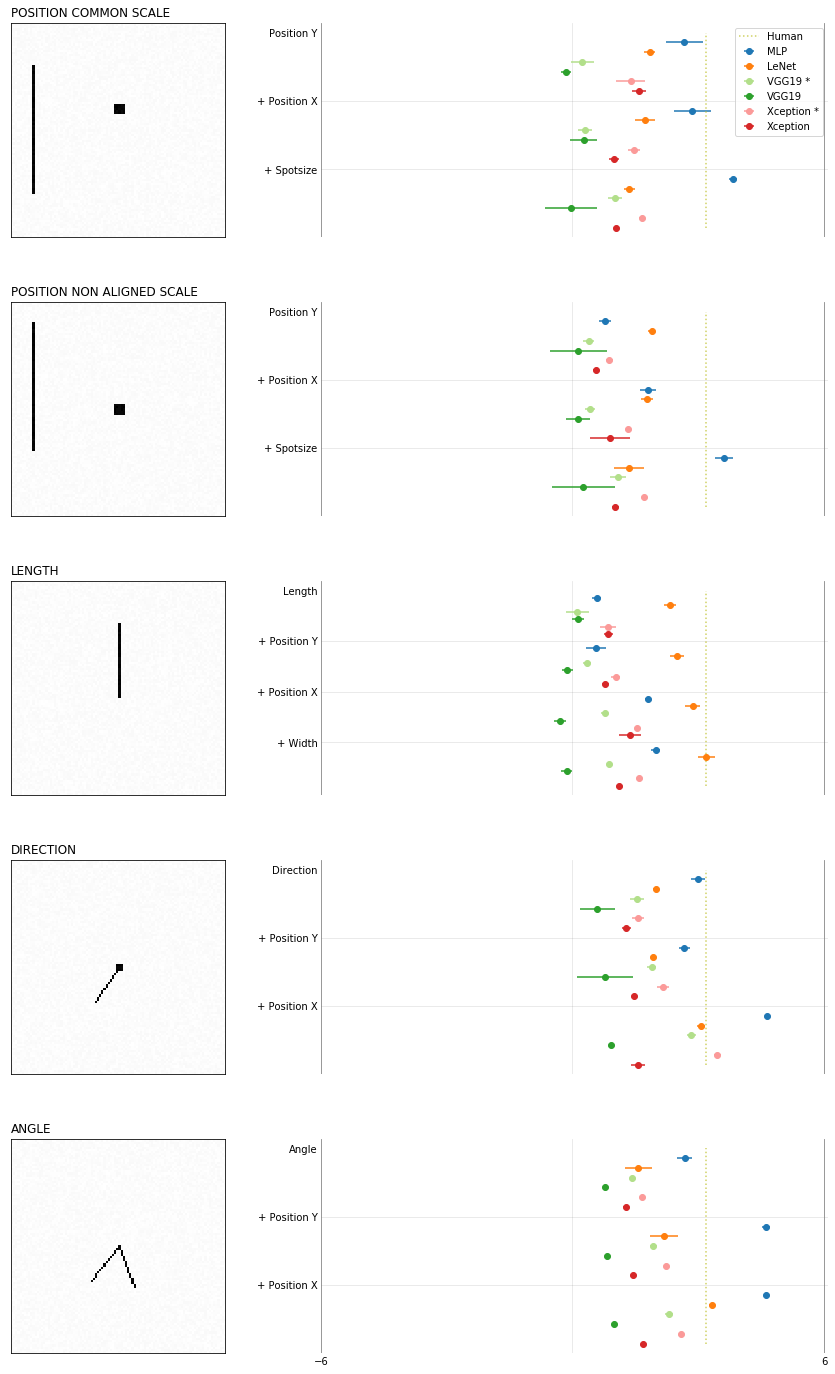

In [21]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, (m-h), m+h, h

fig = plt.figure(figsize=(15,45), facecolor='white')
gs = gridspec.GridSpec(len(experiments), 2, width_ratios=[.5,1], hspace=.3)#, wspace=.5)
# experiments = [experiments[1]]

# print experiments

classifiers3 = ['Image'] + classifiers + classifiers2 + ['Dummy']
# image, mlp, lenet, vgg, xcp, vgg, xcp, dummy
#  0      1     2     3    4   5    6    7
# switch 4 and 5
classifiers3[5], classifiers3[4] = classifiers3[4], classifiers3[5]
# for exp
#        0     1     2     3    4   5   

all_results_fresh = dict(all_results)

# print all_results_fresh['C.Figure1.curvature'][3]

j = 0
for z,experiment in enumerate(experiments[0:5]):
#     print classifiers3
#     print 'b4', all_results_fresh[experiment][3]
#     all_results_fresh[experiment][3], all_results_fresh[experiment][4] =  \
#         all_results_fresh[experiment][4], all_results_fresh[experiment][3]
#     print 'after', all_results_fresh[experiment][3]
    
    for i,c in enumerate(classifiers3):



        
        if i == 0:

            fig = plt.subplot(gs[j])
            j += 1
            
            plt.title(experiment.split('.')[-1].replace('_',' ').upper(), loc='left')
            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()

            image = eval(experiment)(preset=presets[experiment])[1]
            image = image.astype(np.float32)
            image += np.random.uniform(0, 0.05,(100,100))
            
            ax.set_xticklabels('')
            ax.set_yticklabels('')
            ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
            ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
        #     ax.grid(which='major', color='gray', linestyle=':', linewidth='0.5')
            ax.set_axisbelow(True)

            plt.imshow(image, cmap='Greys', interpolation='none')
            
            continue

#         if j <= len(classifiers)+1:
#             plt.title(c)
            
        if i == 1:
            fig = plt.subplot(gs[j])
            j += 1

        if c == 'Dummy':
            errorbars = plt.errorbar([100], y_pos[-1]+1, xerr=[0], fmt='o')
            continue
        
            
        #
        # data
        #
        labels = all_labels[experiment]
        labels = labels[::-1]
        
        new_labels = []
        for l in labels:
            for c_c in range(len(classifiers3)-2):
                new_labels.append(' ')
            new_labels.append(l)
        labels = new_labels
        
        data = all_results_fresh[experiment][i-1]
#         print labels
    
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
        quarter = len(sorted_data[0]) / 4 # always floor
#         print quarter
        data = [r[quarter:-quarter] for r in sorted_data]

    
        means = [np.mean(r) for r in data]
        means = means[::-1] # we start counting from the bottom

        confidence = [1.96*np.std(r) for r in data]
        confidence = confidence[::-1]
      

        len_c = len(classifiers3)-1
        len_labels = len(all_labels[experiment])
#         print len_c, len_labels
        y_pos = range((i-1),len_c*len_labels,len_c) 

        factors  = [5, 3, 1, -1, -3, -5]
        c_factor = factors[i-1]
        
        y_pos = [v+c_factor for v in y_pos]
        
        
        plt.xlim(-6,6.1)
        
        if i==3:
        
            plt.vlines(np.log2(9.125),0,len_c*len_labels-1, colors='C8', linestyles='dotted', label='Human', alpha=.7)
        
        
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
#         if i != 1:
#             ax.get_yaxis().set_ticks([])
#         else:
#         print labels
        ax.get_yaxis().set_ticks(range(len(labels)), minor=False) # we set the labels here
        #ax.get_yaxis().set_ticklabels(labels)
        ax.get_yaxis().set_ticklabels(labels)
        
        if len_labels == 3:
            mmax = 20
        else:
            mmax = 24
        ax.get_yaxis().set_ticks(range(len_c-1,min((len_c-1)*len_labels+len_c,mmax),len_c), minor=True)
#         print (len_c-1)*len_labels+len_c, len(labels)
#         print range(len_c-1,(len_c-1)*len_labels+len_c,len_c)
        ax.get_xaxis().set_ticks(np.arange(-6,7,12)) # mark the tange
        ax.get_xaxis().set_ticks(np.arange(0,0.1), minor=True) # mark the center
        ax.tick_params(axis=u'both', which=u'both',length=0)

        # remove tick marks
        if z!=4:#j <= 2*(len(experiments)-1):
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none')


        # grid lines for X
        plt.grid(True, color='gray', which='minor', axis='y', alpha=0.2)
        plt.grid(True, color='gray', which='major', axis='x', alpha=1)
        plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)
        
        
        
        # trim data
        #
        # POSITION NON ALIGNED SCALE
        # we don't use the just scale experiment anymore due to its lack
        # of parameters but it is part of the Position Y experiment just with more
        # parameters
        # CURVATE
        # we don't mess with the width (distance between the points anymore) since it some
        # how introduced a very very good result which was not reasonable. it seemed
        # like a hard bug to find. this removes one experiment but we think the
        # results were not correct.
        if experiment=='C.Figure1.position_non_aligned_scale':
#             print means
            means = means[:-1]
#             print means
            confidence = confidence[:-1]
#             y_pos = y_pos[:-1]
        elif experiment=='C.Figure1.curvature':
#             print means
            means = means[1:]
#             print means
            confidence = confidence[1:]
#             y_pos = y_pos[:-1]
#         print i, c, y_pos, means, confidence


        c_color = 'C'+str(i-1)
        if i == 3:
            # vgg19 imagenet
            c = c+' *'
            c_color = '#b2df8a'
        elif i == 4:
            # vgg from scratch
#             c = c+'vg s'
            c_color = 'C2'
        elif i == 5:
            # xcpetion imagenet
            c = 'Xception *'
            c_color = '#fb9a99'
        elif i == 6:
            # xception from scratch
#             c = c+'x sc'
            c = 'Xception'
            c_color = 'C3'
#         print i
        errorbars = plt.errorbar(means, y_pos, xerr=confidence, fmt='o', color=c_color, label=c)

#         if i == 6:
#             errorbars = plt.errorbar([100], y_pos[-1]+1, xerr=[0], fmt='o')
        
#         print '-'*80
    if z==0:
        plt.legend()
plt.savefig('../PAPER/gfx/figure1_slim_left.pdf', bbox_inches='tight', pad_inches=0)

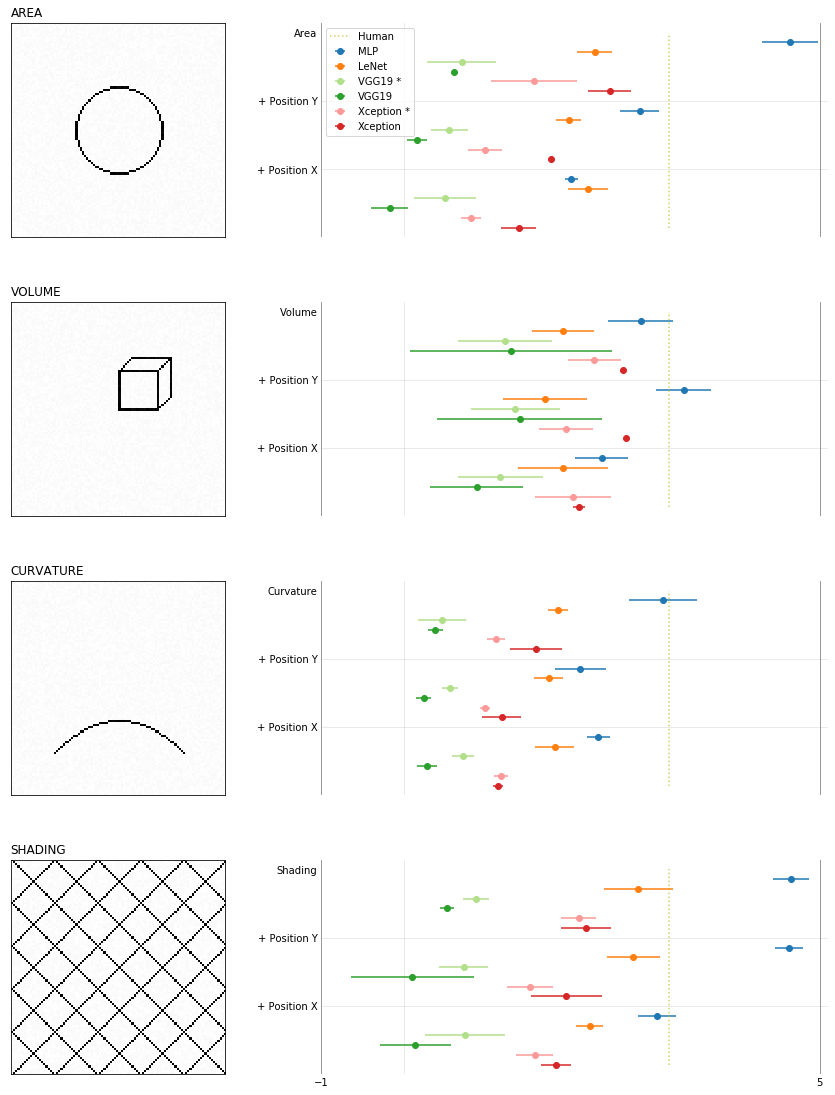

In [22]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, (m-h), m+h, h

fig = plt.figure(figsize=(15,45), facecolor='white')
gs = gridspec.GridSpec(len(experiments), 2, width_ratios=[.5,1], hspace=.3)#, wspace=.5)
# experiments = [experiments[1]]

# print experiments

classifiers3 = ['Image'] + classifiers + classifiers2 + ['Dummy']
# image, mlp, lenet, vgg, xcp, vgg, xcp, dummy
#  0      1     2     3    4   5    6    7
# switch 4 and 5
classifiers3[5], classifiers3[4] = classifiers3[4], classifiers3[5]
# for exp
#        0     1     2     3    4   5   

all_results_fresh = dict(all_results)

# print all_results_fresh['C.Figure1.curvature'][3]

j = 0
for z,experiment in enumerate(experiments[5:]):
#     print classifiers3
#     print 'b4', all_results_fresh[experiment][3]
#     all_results_fresh[experiment][3], all_results_fresh[experiment][4] =  \
#         all_results_fresh[experiment][4], all_results_fresh[experiment][3]
#     print 'after', all_results_fresh[experiment][3]
    
    for i,c in enumerate(classifiers3):



        
        if i == 0:

            fig = plt.subplot(gs[j])
            j += 1
            
            plt.title(experiment.split('.')[-1].replace('_',' ').upper(), loc='left')
            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()

            image = eval(experiment)(preset=presets[experiment])[1]
            image = image.astype(np.float32)
            image += np.random.uniform(0, 0.05,(100,100))
            
            ax.set_xticklabels('')
            ax.set_yticklabels('')
            ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
            ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
        #     ax.grid(which='major', color='gray', linestyle=':', linewidth='0.5')
            ax.set_axisbelow(True)

            plt.imshow(image, cmap='Greys', interpolation='none')
            
            continue

#         if j <= len(classifiers)+1:
#             plt.title(c)
            
        if i == 1:
            fig = plt.subplot(gs[j])
            j += 1

        if c == 'Dummy':
            errorbars = plt.errorbar([100], y_pos[-1]+1, xerr=[0], fmt='o')
            continue
        
            
        #
        # data
        #
        labels = all_labels[experiment]
        labels = labels[::-1]
        
        new_labels = []
        for l in labels:
            for c_c in range(len(classifiers3)-2):
                new_labels.append(' ')
            new_labels.append(l)
        labels = new_labels
        
        data = all_results_fresh[experiment][i-1]
#         print labels
    
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
        quarter = len(sorted_data[0]) / 4 # always floor
#         print quarter
        data = [r[quarter:-quarter] for r in sorted_data]

    
        means = [np.mean(r) for r in data]
        means = means[::-1] # we start counting from the bottom

        confidence = [1.96*np.std(r) for r in data]
        confidence = confidence[::-1]
      

        len_c = len(classifiers3)-1
        len_labels = len(all_labels[experiment])
#         print len_c, len_labels
        y_pos = range((i-1),len_c*len_labels,len_c) 

        factors  = [5, 3, 1, -1, -3, -5]
        c_factor = factors[i-1]
        
        y_pos = [v+c_factor for v in y_pos]
        
        
        plt.xlim(-1,5.1)
        
        if i==3:
        
            plt.vlines(np.log2(9.125),0,len_c*len_labels-1, colors='C8', linestyles='dotted', label='Human', alpha=.7)
        
        
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
#         if i != 1:
#             ax.get_yaxis().set_ticks([])
#         else:
#         print labels
        ax.get_yaxis().set_ticks(range(len(labels)), minor=False) # we set the labels here
        #ax.get_yaxis().set_ticklabels(labels)
        ax.get_yaxis().set_ticklabels(labels)
        
        if len_labels == 3:
            mmax = 20
        else:
            mmax = 24
        ax.get_yaxis().set_ticks(range(len_c-1,min((len_c-1)*len_labels+len_c,mmax),len_c), minor=True)
#         print (len_c-1)*len_labels+len_c, len(labels)
#         print range(len_c-1,(len_c-1)*len_labels+len_c,len_c)
        ax.get_xaxis().set_ticks(np.arange(-1,6,6)) # mark the tange
        ax.get_xaxis().set_ticks(np.arange(0,0.1), minor=True) # mark the center
        ax.tick_params(axis=u'both', which=u'both',length=0)

        # remove tick marks
        if z!=3:#j <= 2*(len(experiments)-1):
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none')


        # grid lines for X
        plt.grid(True, color='gray', which='minor', axis='y', alpha=0.2)
        plt.grid(True, color='gray', which='major', axis='x', alpha=1)
        plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)
        
        
        
        # trim data
        #
        # POSITION NON ALIGNED SCALE
        # we don't use the just scale experiment anymore due to its lack
        # of parameters but it is part of the Position Y experiment just with more
        # parameters
        # CURVATE
        # we don't mess with the width (distance between the points anymore) since it some
        # how introduced a very very good result which was not reasonable. it seemed
        # like a hard bug to find. this removes one experiment but we think the
        # results were not correct.
        if experiment=='C.Figure1.position_non_aligned_scale':
#             print means
            means = means[:-1]
#             print means
            confidence = confidence[:-1]
#             y_pos = y_pos[:-1]
        elif experiment=='C.Figure1.curvature':
#             print means
            means = means[1:]
#             print means
            confidence = confidence[1:]
#             y_pos = y_pos[:-1]
#         print i, c, y_pos, means, confidence


        c_color = 'C'+str(i-1)
        if i == 3:
            # vgg19 imagenet
            c = c+' *'
            c_color = '#b2df8a'
        elif i == 4:
            # vgg from scratch
#             c = c+'vg s'
            c_color = 'C2'
        elif i == 5:
            # xcpetion imagenet
            c = 'Xception *'
            c_color = '#fb9a99'
        elif i == 6:
            # xception from scratch
#             c = c+'x sc'
            c = 'Xception'
            c_color = 'C3'
#         print i
        errorbars = plt.errorbar(means, y_pos, xerr=confidence, fmt='o', color=c_color, label=c)

#         if i == 6:
#             errorbars = plt.errorbar([100], y_pos[-1]+1, xerr=[0], fmt='o')
        
#         print '-'*80
    if z==0:
        plt.legend()
plt.savefig('../PAPER/gfx/figure1_slim_right.pdf', bbox_inches='tight', pad_inches=0)

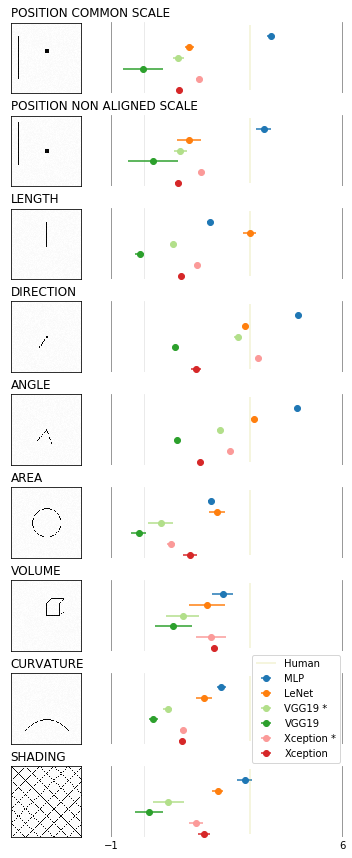

In [23]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, (m-h), m+h, h

fig = plt.figure(figsize=(6,15), facecolor='white')
gs = gridspec.GridSpec(len(experiments), 2, width_ratios=[.3,1], hspace=.3)#, wspace=.5)
# experiments = [experiments[1]]

# print experiments

classifiers3 = ['Image'] + classifiers + classifiers2 + ['Dummy']
# image, mlp, lenet, vgg, xcp, vgg, xcp, dummy
#  0      1     2     3    4   5    6    7
# switch 4 and 5
classifiers3[5], classifiers3[4] = classifiers3[4], classifiers3[5]
# for exp
#        0     1     2     3    4   5   

all_results_fresh = dict(all_results)

# print all_results_fresh['C.Figure1.curvature'][3]

j = 0
for z,experiment in enumerate(experiments):
#     print classifiers3
#     print 'b4', all_results_fresh[experiment][3]
#     all_results_fresh[experiment][3], all_results_fresh[experiment][4] =  \
#         all_results_fresh[experiment][4], all_results_fresh[experiment][3]
#     print 'after', all_results_fresh[experiment][3]
    
    for i,c in enumerate(classifiers3):



        
        if i == 0:

            fig = plt.subplot(gs[j])
            j += 1
            
            plt.title(experiment.split('.')[-1].replace('_',' ').upper(), loc='left')
            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()

            image = eval(experiment)(preset=presets[experiment])[1]
            image = image.astype(np.float32)
            image += np.random.uniform(0, 0.05,(100,100))
            
            ax.set_xticklabels('')
            ax.set_yticklabels('')
            ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
            ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
        #     ax.grid(which='major', color='gray', linestyle=':', linewidth='0.5')
            ax.set_axisbelow(True)

            plt.imshow(image, cmap='Greys', interpolation='none')
            
            continue

#         if j <= len(classifiers)+1:
#             plt.title(c)
            
        if i == 1:
            fig = plt.subplot(gs[j])
            j += 1

        if c == 'Dummy':
#             print y_pos
#             errorbars = plt.errorbar([100], y_pos[-1]+1, xerr=[0], fmt='o')
            continue
        
            
        #
        # data
        #
        labels = all_labels[experiment]
        labels = labels[::-1]
        
        new_labels = []
        for l in labels:
            for c_c in range(len(classifiers3)-2):
                new_labels.append(' ')
            new_labels.append(l)
        labels = new_labels
        
        data = all_results_fresh[experiment][i-1]
#         print labels
    
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
        quarter = len(sorted_data[0]) / 4 # always floor
#         print quarter
        data = [r[quarter:-quarter] for r in sorted_data]

    
        means = [np.mean(r) for r in data]
        means = means[::-1] # we start counting from the bottom

        confidence = [1.96*np.std(r) for r in data]
        confidence = confidence[::-1]
      
        
    

        len_c = len(classifiers3)-1
        len_labels = len(all_labels[experiment])
#         print len_c, len_labels
        y_pos = range((i-1),len_c*len_labels,len_c) 

        factors  = [5, 3, 1, -1, -3, -5]
        c_factor = factors[i-1]
        
        y_pos = [v+c_factor for v in y_pos]
        
        
        
        
        
        plt.xlim(-1,6.1)
        
        if i==3:
#             means = [np.log2(9.125)]#human_values[row][0]
#             confidence = [0]#human_values[row][1]
            
#             errorbars = plt.errorbar(means, 7, xerr=confidence, fmt='o',  color='black', label='Human')
#             continue
            plt.vlines(np.log2(9.125),0,len_c-1, colors='C8', linestyles='solid', label='Human', alpha=.2)
        
        
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.get_yaxis().set_ticks([])
        labels = [labels[0]]

        ax.get_xaxis().set_ticks(np.arange(-1,7,7)) # mark the tange
        ax.get_xaxis().set_ticks(np.arange(0,0.1), minor=True) # mark the center
        ax.tick_params(axis=u'both', which=u'both',length=0)

        # remove tick marks
        if z!=8:#j <= 2*(len(experiments)-1):
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none')


        # grid lines for X
        plt.grid(True, color='gray', which='major', axis='x', alpha=1)
        plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)
        
        
        
        # trim data
        #
        # POSITION NON ALIGNED SCALE
        # we don't use the just scale experiment anymore due to its lack
        # of parameters but it is part of the Position Y experiment just with more
        # parameters
        # CURVATE
        # we don't mess with the width (distance between the points anymore) since it some
        # how introduced a very very good result which was not reasonable. it seemed
        # like a hard bug to find. this removes one experiment but we think the
        # results were not correct.
        if experiment=='C.Figure1.position_non_aligned_scale':
#             print means
            means = means[:-1]
#             print means
            confidence = confidence[:-1]
#             y_pos = y_pos[:-1]
        elif experiment=='C.Figure1.curvature':
#             print means
            means = means[1:]
#             print means
            confidence = confidence[1:]
#             y_pos = y_pos[:-1]
#         print i, c, y_pos, means, confidence


        c_color = 'C'+str(i-1)
        if i == 3:
            # vgg19 imagenet
            c = c+' *'
            c_color = '#b2df8a'
        elif i == 4:
            # vgg from scratch
#             c = c+'vg s'
            c_color = 'C2'
        elif i == 5:
            # xcpetion imagenet
            c = 'Xception *'
            c_color = '#fb9a99'
        elif i == 6:
            # xception from scratch
#             c = c+'x sc'
            c = 'Xception'
            c_color = 'C3'
#         print i


        means = [means[0]]
        y_pos = [y_pos[0]]
        confidence = [confidence[0]]
#         print y_pos
        errorbars = plt.errorbar(means, y_pos, xerr=confidence, fmt='o', color=c_color, label=c)

#         if i == 6:
#             errorbars = plt.errorbar([100], y_pos[-1]+1, xerr=[0], fmt='o')
        
#         print '-'*80
    if z==7:
        plt.legend(loc='right')
plt.savefig('../PAPER/gfx/figure1_slim_only_last.pdf', bbox_inches='tight', pad_inches=0)

In [152]:
classifiers3

['Image', 'MLP', 'LeNet', 'VGG19', 'XCEPTION', 'VGG19', 'XCEPTION', 'Dummy']

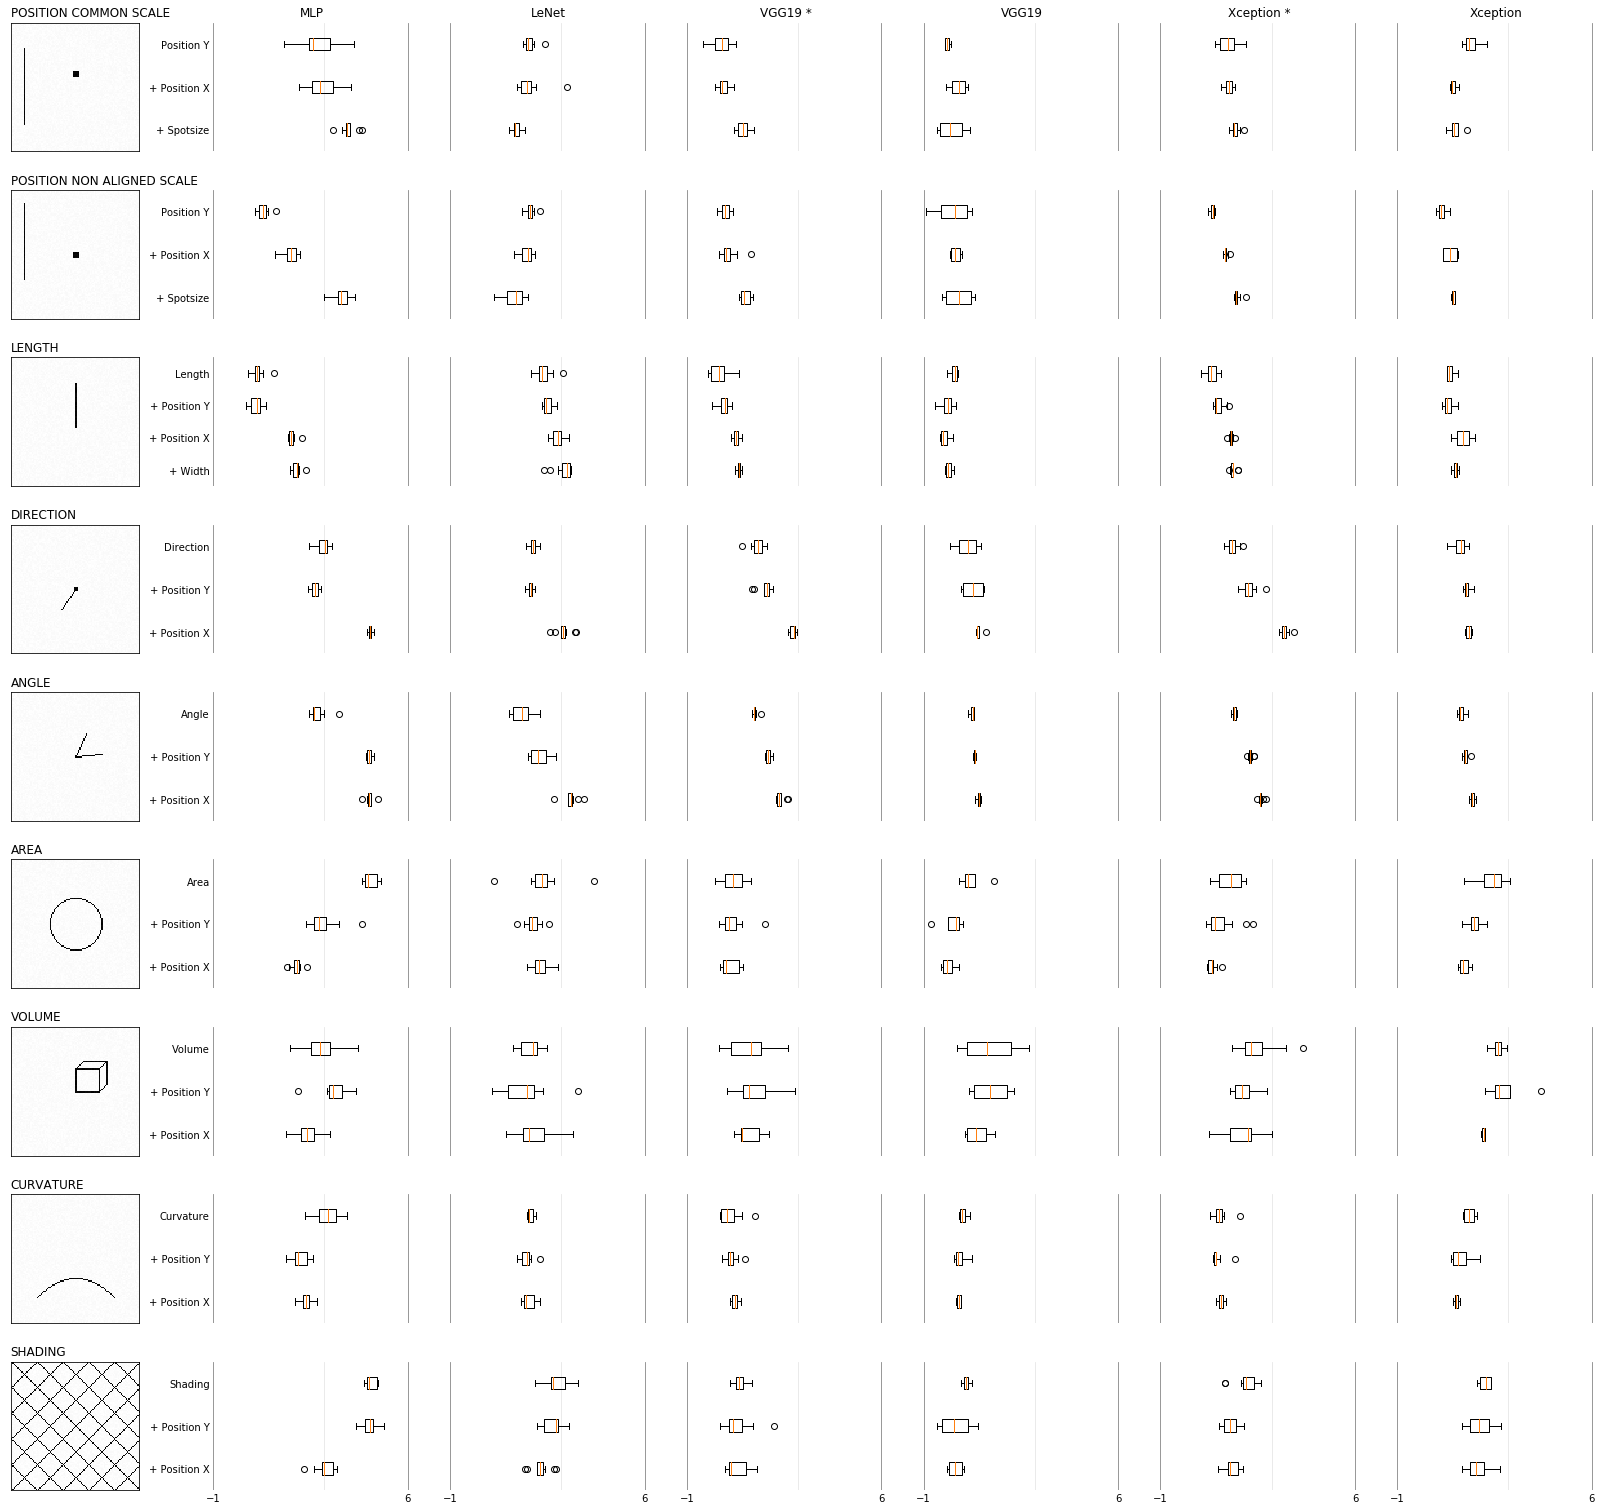

In [30]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, (m-h), m+h, h

fig = plt.figure(figsize=(29,len(experiments)*3), facecolor='white')
gs = gridspec.GridSpec(len(experiments), 7, width_ratios=[1,1,1,1,1,1,1], hspace=.3)#, wspace=.5)
# experiments = [experiments[1]]

# print experiments

j = 0
for experiment in experiments:
    
    for i,c in enumerate(['Image','MLP', 'LeNet', 'VGG19 *', 'VGG19', 'Xception *', 'Xception']):

        fig = plt.subplot(gs[j])
        j += 1

        
        if i == 0:
            
            plt.title(experiment.split('.')[-1].replace('_',' ').upper(), loc='left')
            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()
            
            image = eval(experiment)(preset=presets[experiment])[1]
            image = image.astype(np.float32)
            image += np.random.uniform(0, 0.05,(100,100))
            
            ax.set_xticklabels('')
            ax.set_yticklabels('')
            ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
            ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
        #     ax.grid(which='major', color='gray', linestyle=':', linewidth='0.5')
            ax.set_axisbelow(True)

            plt.imshow(image, cmap='Greys', interpolation='none')
            
            continue

        if j <= 6+1:
            plt.title(c)
            

        #
        # data
        #
        labels = all_labels[experiment]
        labels = labels[::-1]
#         print labels
        data = all_results[experiment][i-1]
#         print data

        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
        quarter = len(sorted_data[0]) / 4 # always floor
#         print quarter
        data = [r[quarter:-quarter] for r in sorted_data]
#         print sorted_data
#         print 'before', data
#         data = sorted_data[quarter:-quarter]
#         print 'after', data
    
        means = [np.mean(r) for r in data]
        means = means[::-1] # we start counting from the bottom
#         print means
        
#         confidence = [mean_confidence_interval(r)[3] for r in data]
        
        confidence = [1.96*np.std(r) for r in data]
        confidence = confidence[::-1]
        
#         # sort the means
#         means.sort()
#         print 'MEANS SORTED', means
        
#         # cut the midmean
#         means = means[1,2]
#         confidence = confidence[1,2]
        
        
#         data_dict = {}
#         data_dict['x'] = means
#         data_dict['xerr'] = confidence
#         data_dict['y'] = 
        
        
        y_pos = range(len(means))


#         means = [3] + means + [10]
#         print means
#         labels = ['a'] + labels + ['Z']
#         print labels
#         confidence = [0] + confidence + [0]
#         print confidence
        
        plt.xlim(-1,6.1)
        
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        if i != 1:
            ax.get_yaxis().set_ticks([])
#         else:
# #             print labels
#             ax.get_yaxis().set_ticks(range(len(labels))) # we set the labels here
#             ax.get_yaxis().set_ticklabels(labels)
            
        ax.get_xaxis().set_ticks(np.arange(-1,7,7)) # mark the tange
        ax.get_xaxis().set_ticks(np.arange(3,3.1), minor=True) # mark the center
        ax.tick_params(axis=u'both', which=u'both',length=0)

        # remove tick marks
        if j <= 7*(len(experiments)-1):
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none')


        # trim data
        #
        # POSITION NON ALIGNED SCALE
        # we don't use the just scale experiment anymore due to its lack
        # of parameters but it is part of the Position Y experiment just with more
        # parameters
        # CURVATE
        # we don't mess with the width (distance between the points anymore) since it some
        # how introduced a very very good result which was not reasonable. it seemed
        # like a hard bug to find. this removes one experiment but we think the
        # results were not correct.
        if experiment=='C.Figure1.position_non_aligned_scale':

            sorted_data = sorted_data[1:]

        elif experiment=='C.Figure1.curvature':

            sorted_data = sorted_data[:-1]
            
        # grid lines for X
        plt.grid(True, color='gray', which='major', axis='x', alpha=1)
        plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)
#         print means, labels
        if i == 1:
            boxplots = plt.boxplot(sorted_data[::-1], vert=False, labels=labels)#, xerr=confidence, fmt='o', color='black', capsize=4)
        else:
            boxplots = plt.boxplot(sorted_data[::-1], vert=False, labels=['']*len(labels))
#         print '-'*80
plt.savefig('../PAPER/gfx/figure1_boxplot_new.pdf', bbox_inches='tight', pad_inches=0)

## Cross-Validation

In [148]:
EXPERIMENT = 'C.Figure1.area'
CLASSIFIER = 'MLP'
DATASETS = ['0', '1', '2']#, '3']

for DATASET in DATASETS:
    stichproben = []
    preds = []
    gts = []
    for i in range(1,5):
        with open(RESULTS_DIR+EXPERIMENT+'/'+DATASET+'/'+CLASSIFIER+'/'+str(i).zfill(2)+'_noise.p', 'r') as f:
            gepickelte_datei = pickle.load(f)
            stichproben.append(gepickelte_datei['MLAE'])
            preds.append(gepickelte_datei['y_pred'].ravel())
            gts.append(gepickelte_datei['y_test'].ravel())

    label = all_labels[EXPERIMENT][int(DATASET)]
    
    print stichproben
    print 'DATA', DATASET, label, np.mean(stichproben), np.std(stichproben)
    print 'PREDS', 'min', np.min(preds), 'max', np.max(preds), 'mean', np.mean(preds), 'stddev',np.std(preds)
    print 'GT', 'min', np.min(gts), 'max', np.max(gts), 'mean', np.mean(gts), 'stddev',np.std(gts)
    print '-'*80
    

[4.9961674399579854, 4.6018013863865219, 4.9775861620677011, 5.0509851755924853]
DATA 0 Area 4.906635041 0.178052401266
PREDS min -0.0243922 max 0.340622 mean 0.132863 stddev 0.0728659
GT min 0.00187617 max 0.950594 mean 0.419776 stddev 0.282251
--------------------------------------------------------------------------------
[2.3535813807155876, 2.919351096564502, 3.0283328826440008, 3.1926845689181009]
DATA 1 + Position Y 2.87348748221 0.315543065084
PREDS min 0.00461019 max 0.991046 mean 0.26156 stddev 0.172126
GT min 0.00500313 max 0.902439 mean 0.301764 stddev 0.233009
--------------------------------------------------------------------------------
[1.9990203122327281, 2.0315199917207942, 2.066447937596597, 2.3697066289895146]
DATA 2 + Position X 2.11667371763 0.148021758577
PREDS min 0.00139271 max 1.17829 mean 0.380296 stddev 0.309237
GT min 0.00500313 max 0.950594 mean 0.397461 stddev 0.313331
--------------------------------------------------------------------------------


In [90]:
print stichproben
print np.mean(stichproben), np.var(stichproben)

[2.5668684923192755, 1.5271388252316846, 4.0017983331903526, 5.7643393157690683, 1.9337126235463267, 3.5604610041134284, 2.2825245770595135, 2.0347820062014703, 1.8903650404751158, 1.9296766775400571]
2.74916668954 1.56473050222


# RANKINGS

## averaged per classifier across all tasks

In [32]:
results = {}
for experiment in experiments:
    
    mean_per_experiment = []
    
    for i,c in enumerate(['MLP', 'LeNet', 'VGG19 *', 'VGG19', 'Xception *', 'Xception']):
        
        #
        # data
        #
        labels = all_labels[experiment]
        labels = labels[::-1]
        data = all_results[experiment][i]
    
#         if experiment == 'C.Figure1.length':
#             print data
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
        quarter = len(sorted_data[0]) / 4 # always floor

        data = [r[quarter:-quarter] for r in sorted_data]

        
        means = [np.mean(r) for r in data]
        means = means[::-1] # we start counting from the bottom
        
        if experiment == 'C.Figure1.length':
            means = np.array(means)
            means = means[~np.isnan(means)]
            #print means
        
        # trim data
        #
        # POSITION NON ALIGNED SCALE
        # we don't use the just scale experiment anymore due to its lack
        # of parameters but it is part of the Position Y experiment just with more
        # parameters
        # CURVATE
        # we don't mess with the width (distance between the points anymore) since it some
        # how introduced a very very good result which was not reasonable. it seemed
        # like a hard bug to find. this removes one experiment but we think the
        # results were not correct.
        if experiment=='C.Figure1.position_non_aligned_scale':
#             print means
            means = means[:-1]
#             print means
            confidence = confidence[:-1]
            y_pos = y_pos[:-1]
        elif experiment=='C.Figure1.curvature':
#             print means
            means = means[1:]
#             print means
            confidence = confidence[1:]
            y_pos = y_pos[:-1]
        
        mean_per_c = np.mean(means)
        
        mean_per_experiment.append(mean_per_c)
#         print experiment, c, mean_per_c
    results[experiment] = mean_per_experiment
#     results[experiment] = np.mean(mean_per_experiment)
    
# for k, v in sorted(results.iteritems(), key=lambda (k,v): (v,k)):


#     print "%s: %s" % (k.split('.')[-1].replace('_',' ').upper(), v)

In [33]:
# compare ANOVA 
from pyvttbl import DataFrame
from scipy.stats import ttest_ind, ttest_ind_from_stats

human = [np.log2(9)] * 9

for i,c in enumerate(['MLP', 'LeNet', 'VGG19 *', 'VGG19', 'Xception *', 'Xception']):
#     print c
    all_e = []
    for e in results:
        all_e.append(results[e][i])
        
#     print 'MLAE, MAE', np.round(np.mean(all_e),2), np.round(np.exp2(np.mean(all_e))-.125,2)
    print str(np.round(np.mean(all_e),2)) + ' ($SD='+str(np.round(np.std(all_e),3))+'$)'#np.round(np.exp2(np.mean(all_e))-.125,2)


df = DataFrame()
df_data = []
df_conditions = []
c_results = []
for i,c in enumerate(['MLP', 'LeNet', 'VGG19 *', 'VGG19', 'Xception *', 'Xception']):
#     print c
    all_e = []
    for e in results:
        all_e.append(results[e][i])

    c_results.append(all_e)
        
    # ANOVA
    if len(df_data) == 0:
        df_data = all_e
    else:
        df_data = df_data + all_e
    if len(df_conditions) == 0:
        df_conditions = [c]*len(all_e)
    else:
#         print df_conditions,  [c]*len(all_e)
        df_conditions = df_conditions + [c]*len(all_e)

df['data'] = df_data
df['conditions'] = df_conditions
print df_data, df_conditions
aov_pyvttbl = df.anova1way('data', 'conditions')
print aov_pyvttbl

# # Welch's t-test

# t, p = ttest_ind(all_e, human, equal_var=False)
# print c,' vs. Human', t,p


2.94 ($SD=0.857$)
2.13 ($SD=0.38$)
0.98 ($SD=0.581$)
0.4 ($SD=0.407$)
1.63 ($SD=0.462$)
1.51 ($SD=0.485$)
[3.1642273294487624, 2.0668545905771532, 2.5221849653614985, 3.1225783522937562, 1.2316330142698344, 3.9694662002152445, 4.1079002172996342, 2.862910559913022, 3.435937099699744, 2.1596947552639416, 1.6729485256073013, 1.8005997923951007, 1.6458393564875298, 2.7200193373418107, 2.3620744384886074, 2.6025653443468628, 1.8402420744683343, 2.3235178201559878, 0.57627804741445576, 0.62898234448899137, 0.57270173906338728, 0.51954066008337108, 0.52647486850193825, 1.88966577105339, 0.77067801892291177, 1.236633010424139, 2.0872130004338092, 0.1917220497297164, 0.17433479202174432, 0.2966375321767124, 0.023178423201798332, -0.10855697756774951, 0.86520585860718813, 0.24949086415805888, 1.1813905473342883, 0.7652370096086053, 1.1145626288862454, 1.3076574609408862, 1.0841128312368609, 1.5022670606420829, 1.254900173327985, 2.1662214811195328, 1.7292876696575579, 2.087540197117336, 2.39555

In [40]:
# test for classifier dependency   
t, p = ttest_ind(c_results[3], c_results[4], equal_var=False)
print  t,p
t, p = ttest_ind(c_results[3], c_results[5], equal_var=False)
print  t,p

-5.6213933467 4.05615811102e-05
-4.94375733421 0.000159941771476


In [39]:
t, p = ttest_ind(c_results[1], c_results[2], equal_var=False)
print  t,p
t, p = ttest_ind(c_results[1], c_results[3], equal_var=False)
print  t,p

4.67441455564 0.000372437651592
8.74623638876 1.77411424358e-07


## averaged per all classifiers

In [41]:
results = {}
for experiment in experiments:
    
    mean_per_experiment = []
    
    for i,c in enumerate(['MLP', 'LeNet', 'VGG19 *', 'VGG19', 'Xception *', 'Xception']):
        
        #
        # data
        #
        labels = all_labels[experiment]
        labels = labels[::-1]
        data = all_results[experiment][i]
    
#         if experiment == 'C.Figure1.length':
#             print data
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
        quarter = len(sorted_data[0]) / 4 # always floor

        data = [r[quarter:-quarter] for r in sorted_data]

        
        means = [np.mean(r) for r in data]
        means = means[::-1] # we start counting from the bottom
        
        if experiment == 'C.Figure1.length':
            means = np.array(means)
            means = means[~np.isnan(means)]
            #print means
        
        # trim data
        #
        # POSITION NON ALIGNED SCALE
        # we don't use the just scale experiment anymore due to its lack
        # of parameters but it is part of the Position Y experiment just with more
        # parameters
        # CURVATE
        # we don't mess with the width (distance between the points anymore) since it some
        # how introduced a very very good result which was not reasonable. it seemed
        # like a hard bug to find. this removes one experiment but we think the
        # results were not correct.
        if experiment=='C.Figure1.position_non_aligned_scale':
#             print means
            means = means[:-1]
#             print means
            confidence = confidence[:-1]
            y_pos = y_pos[:-1]
        elif experiment=='C.Figure1.curvature':
#             print means
            means = means[1:]
#             print means
            confidence = confidence[1:]
            y_pos = y_pos[:-1]
        
        mean_per_c = np.mean(means)
        
        mean_per_experiment.append(mean_per_c)
#         print experiment, c, mean_per_c
    results[experiment] = np.mean(mean_per_experiment)
    
for k, v in sorted(results.iteritems(), key=lambda (k,v): (v,k)):
    print "%s: %s" % (k.split('.')[-1].replace('_',' ').upper(), v)

LENGTH: 1.10924280246
POSITION NON ALIGNED SCALE: 1.11273933044
CURVATURE: 1.26232148734
POSITION COMMON SCALE: 1.33634398234
AREA: 1.51349421166
SHADING: 1.90821029292
VOLUME: 1.9459358897
DIRECTION: 2.07510823679
ANGLE: 2.12000930903


In [42]:
avg = []
for r in results:
    avg.append(results[r])

In [43]:
avg

[1.5134942116590946,
 1.1127393304368456,
 1.2623214873389002,
 1.3363439823435224,
 1.1092428024629826,
 2.1200093090311118,
 1.9082102929244824,
 1.945935889700074,
 2.0751082367859066]

In [44]:
np.mean(avg), np.round(np.exp2(np.mean(avg))-.125,3), np.round(np.std(avg),3), np.std(np.exp2(avg)-.125)

(1.5981561714092134, 2.903, 0.39200000000000002, 0.84484941270369307)

## most complex per all classifiers

In [314]:
results = {}
for experiment in experiments:
    
    mean_per_experiment = []
    
    for i,c in enumerate(['MLP', 'LeNet', 'VGG19 *', 'VGG19', 'Xception *', 'Xception']):
        
        #
        # data
        #
        labels = all_labels[experiment]
        labels = labels[::-1]
        data = all_results[experiment][i]
    
    
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
        quarter = len(sorted_data[0]) / 4 # always floor

        data = [r[quarter:-quarter] for r in sorted_data]

        means = [np.mean(r) for r in data]
        means = means[::-1] # we start counting from the bottom
        
        if experiment == 'C.Figure1.length':
            means = np.array(means)
            means = means[~np.isnan(means)]
        
        # trim data
        #
        # POSITION NON ALIGNED SCALE
        # we don't use the just scale experiment anymore due to its lack
        # of parameters but it is part of the Position Y experiment just with more
        # parameters
        # CURVATE
        # we don't mess with the width (distance between the points anymore) since it some
        # how introduced a very very good result which was not reasonable. it seemed
        # like a hard bug to find. this removes one experiment but we think the
        # results were not correct.
        if experiment=='C.Figure1.position_non_aligned_scale':
#             print means
            means = means[:-1]
#             print means
            confidence = confidence[:-1]
            y_pos = y_pos[:-1]
        elif experiment=='C.Figure1.curvature':
#             print means
            means = means[1:]
#             print means
            confidence = confidence[1:]
            y_pos = y_pos[:-1]
        
        
        most_complex_parameters = means[0]
#         print experiment,means[0]
        mean_per_c = most_complex_parameters
        
        mean_per_experiment.append(mean_per_c)
#         print experiment, c, mean_per_c
    results[experiment] = np.mean(mean_per_experiment)
    
for k, v in sorted(results.iteritems(), key=lambda (k,v): (v,k)):
    print "%s: %s" % (k.split('.')[-1].replace('_',' ').upper(), v)

AREA: 1.12037664991
CURVATURE: 1.23875893949
LENGTH: 1.43675416881
POSITION COMMON SCALE: 1.47902498867
POSITION NON ALIGNED SCALE: 1.51323575467
SHADING: 1.58888534432
VOLUME: 1.74238050048
ANGLE: 2.59300950058
DIRECTION: 2.74940929976


## find best classifier on most complex

In [315]:
results = {}
for experiment in experiments:
    
    mean_per_experiment_per_c = [None]*6
    
    for i,c in enumerate(['MLP', 'LeNet', 'VGG19 *', 'VGG19', 'Xception *', 'Xception']):
        
        #
        # data
        #
        labels = all_labels[experiment]
        labels = labels[::-1]
        data = all_results[experiment][i]
    
    
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
        quarter = len(sorted_data[0]) / 4 # always floor

        data = [r[quarter:-quarter] for r in sorted_data]

        means = [np.mean(r) for r in data]
        means = means[::-1] # we start counting from the bottom
        
        if experiment == 'C.Figure1.length':
            means = np.array(means)
            means = means[~np.isnan(means)]
        
        
        # trim data
        #
        # POSITION NON ALIGNED SCALE
        # we don't use the just scale experiment anymore due to its lack
        # of parameters but it is part of the Position Y experiment just with more
        # parameters
        # CURVATE
        # we don't mess with the width (distance between the points anymore) since it some
        # how introduced a very very good result which was not reasonable. it seemed
        # like a hard bug to find. this removes one experiment but we think the
        # results were not correct.
        if experiment=='C.Figure1.position_non_aligned_scale':
#             print means
            means = means[:-1]
#             print means
            confidence = confidence[:-1]
            y_pos = y_pos[:-1]
        elif experiment=='C.Figure1.curvature':
#             print means
            means = means[1:]
#             print means
            confidence = confidence[1:]
            y_pos = y_pos[:-1]
        
        most_complex_parameters = means[0]
#         print experiment,means[0]
        mean_per_c = np.mean(means)
        
        mean_per_experiment_per_c[i] = (most_complex_parameters, mean_per_c)
        
#     mean_per_experiment_per_c
#         print experiment, c, mean_per_c
    results[experiment] = mean_per_experiment_per_c#np.mean(mean_per_experiment)
    

print 'Classifier, Averaged across parametrizations, Averaged for most complex parameterization'
for i,c in enumerate(['MLP', 'LeNet', 'VGG19 *', 'VGG19', 'Xception *', 'Xception']):
    
    mean_per_c = 0
    mean_per_c_most_complex = 0
    
    for e in experiments:
        mean_per_c += results[e][i][1]
        mean_per_c_most_complex += results[e][i][0]
    
    print c, mean_per_c / float(len(experiments)), mean_per_c_most_complex / float(len(experiments))


Classifier, Averaged across parametrizations, Averaged for most complex parameterization
MLP 2.94263248101 3.16317674457
LeNet 2.12527793828 2.27325610376
VGG19 * 0.978685273376 1.24630688024
VGG19 0.404293344363 0.344938992398
Xception * 1.62690015098 1.84282180195
Xception 1.50410630303 1.43738957487


## ranking for VGG19

In [36]:
ranking = []
best_results = []

for i,c in enumerate(['MLP', 'LeNet', 'VGG19 *', 'VGG19', 'Xception *', 'Xception']):

    results_avg = {}
    results_best = {}
    
    print c
    
    for experiment in experiments:

#         i = 3 # VGG19

        #
        # data
        #
        labels = all_labels[experiment]
        labels = labels[::-1]
        data = all_results[experiment][i]


        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
        quarter = len(sorted_data[0]) / 4 # always floor

        data = [r[quarter:-quarter] for r in sorted_data]

        means = [np.mean(r) for r in data]
        means = means[::-1] # we start counting from the bottom


        # trim data
        #
        # POSITION NON ALIGNED SCALE
        # we don't use the just scale experiment anymore due to its lack
        # of parameters but it is part of the Position Y experiment just with more
        # parameters
        # CURVATE
        # we don't mess with the width (distance between the points anymore) since it some
        # how introduced a very very good result which was not reasonable. it seemed
        # like a hard bug to find. this removes one experiment but we think the
        # results were not correct.
        if experiment=='C.Figure1.position_non_aligned_scale':
    #             print means
            means = means[:-1]
    #             print means
            confidence = confidence[:-1]
            y_pos = y_pos[:-1]
        elif experiment=='C.Figure1.curvature':
    #             print means
            means = means[1:]
    #             print means
            confidence = confidence[1:]
            y_pos = y_pos[:-1]

        most_complex_parameters = means[0]
    #         print experiment,means[0]
        mean_per_c = np.mean(means)


    #     mean_per_experiment_per_c
    #         print experiment, c, mean_per_c
        results_avg[experiment] = mean_per_c#np.mean(mean_per_experiment)
        results_best[experiment] = most_complex_parameters

        
    best_results.append(results_best)
    # print 'Averaged'
    # for k, v in sorted(results_avg.iteritems(), key=lambda (k,v): (v,k)):
    #     print "%s: %s" % (k.split('.')[-1].replace('_',' ').upper(), v)
#     print
#     print 'Most complex'
#     for k, v in sorted(results_best.iteritems(), key=lambda (k,v): (v,k)):
#         print "%s: %s" % (k.split('.')[-1].replace('_',' ').upper(), v)
        
#     print
    
    
humans = [1,2,3,3,3,4,5,5,6]
for j,e in enumerate(experiments):
    
    print '\multicolumn{7}{l}{\emph{'+e.split('.')[-1].replace('_',' ')+'}} \\\\'
    outstr = ''
    for i,c in enumerate(['MLP', 'LeNet', 'VGG19 *', 'VGG19', 'Xception *', 'Xception']):

        r = best_results[i]
        
        sortiert = sorted(r.iteritems(), key=lambda (k,v):(v,k))
        for k,s in enumerate(sortiert):
#             print k,s
            if e == s[0]:
                # yes
                if i == 0:
                    outstr += str(humans[j]) + '. & '
                    
                if i == 3:
                    outstr += '\\textbf{' + str(k+1) + ' ('+str(np.round(s[1],2))+')'+ '} & '
                else:
                    outstr += str(k+1) + '. ('+str(np.round(s[1],2))+')'+' & '
        
    print outstr + '\\\\'
#         for k, v in sorted(results_best.iteritems(), key=lambda (k,v): (v,k)):
#             print "%s: %s" % (k.split('.')[-1].replace('_',' ').upper(), v)

MLP
LeNet
VGG19 *
VGG19
Xception *
Xception
\multicolumn{7}{l}{\emph{position common scale}} \\
1. & 7. (3.84) & 2. (1.36) & 5. (1.02) & \textbf{3 (-0.04)} & 5. (1.65) & 2. (1.04) & \\
\multicolumn{7}{l}{\emph{position non aligned scale}} \\
2. & 6. (3.61) & 1. (1.35) & 6. (1.09) & \textbf{5 (0.26)} & 6. (1.71) & 1. (1.02) & \\
\multicolumn{7}{l}{\emph{length}} \\
3. & 1. (1.99) & 8. (3.19) & 4. (0.87) & \textbf{2 (-0.14)} & 4. (1.59) & 3. (1.11) & \\
\multicolumn{7}{l}{\emph{direction}} \\
3. & 9. (4.65) & 7. (3.07) & 9. (2.84) & \textbf{8 (0.92)} & 9. (3.46) & 6. (1.57) & \\
\multicolumn{7}{l}{\emph{angle}} \\
3. & 8. (4.61) & 9. (3.33) & 8. (2.31) & \textbf{9 (0.99)} & 8. (2.6) & 7. (1.69) & \\
\multicolumn{7}{l}{\emph{area}} \\
4. & 2. (2.01) & 5. (2.21) & 1. (0.49) & \textbf{1 (-0.17)} & 1. (0.8) & 5. (1.38) & \\
\multicolumn{7}{l}{\emph{volume}} \\
5. & 4. (2.38) & 4. (1.91) & 7. (1.16) & \textbf{7 (0.87)} & 7. (2.03) & 9. (2.1) & \\
\multicolumn{7}{l}{\emph{curvature}} \\
5. & 3

In [417]:
ranks = []
ranks.append([])
ranks.append([])
ranks.append([])
ranks.append([])
ranks.append([])
ranks.append([])

for j,e in enumerate(experiments):
    
    for i,c in enumerate(['MLP', 'LeNet', 'VGG19 *', 'VGG19', 'Xception *', 'Xception']):

        r = best_results[i]
        
        
        sortiert = sorted(r.iteritems(), key=lambda (k,v):(v,k))
#         print sortiert
        for k,s in enumerate(sortiert):
#             print k,s
            if e == s[0]:
                ranks[i].append(k+1)
        
#                 ranks[i].append(str(k+1))
        
#                 # yes
#                 if i == 0:
#                     outstr += str(humans[j]) + ' & '
                    
#                 if i == 3:
#                     outstr += '\\textbf{' + str(k+1) + ' ('+str(np.round(s[1],2))+')'+ '} & '
#                 else:
#                     outstr += str(k+1) + ' ('+str(np.round(s[1],2))+')'+' & '
        
#     print outstr + '\\\\'
print ranks

[[7, 6, 1, 9, 8, 2, 4, 3, 5], [2, 1, 8, 7, 9, 5, 4, 3, 6], [5, 6, 4, 9, 8, 1, 7, 2, 3], [3, 5, 2, 8, 9, 1, 7, 6, 4], [5, 6, 4, 9, 8, 1, 7, 2, 3], [1, 2, 3, 6, 7, 5, 9, 4, 8]]


In [423]:
ranks

[[7, 6, 1, 9, 8, 2, 4, 3, 5],
 [2, 1, 8, 7, 9, 5, 4, 3, 6],
 [5, 6, 4, 9, 8, 1, 7, 2, 3],
 [3, 5, 2, 8, 9, 1, 7, 6, 4],
 [5, 6, 4, 9, 8, 1, 7, 2, 3],
 [1, 2, 3, 6, 7, 5, 9, 4, 8]]

In [424]:
list(np.array(ranks).ravel())

[7,
 6,
 1,
 9,
 8,
 2,
 4,
 3,
 5,
 2,
 1,
 8,
 7,
 9,
 5,
 4,
 3,
 6,
 5,
 6,
 4,
 9,
 8,
 1,
 7,
 2,
 3,
 3,
 5,
 2,
 8,
 9,
 1,
 7,
 6,
 4,
 5,
 6,
 4,
 9,
 8,
 1,
 7,
 2,
 3,
 1,
 2,
 3,
 6,
 7,
 5,
 9,
 4,
 8]

In [422]:
df = DataFrame()
df['data'] = [1,2,3,3,3,4,5,5,6] + list(np.array(ranks).ravel())
df['conditions'] = ['Human']*9 + ['MLP']*9 + ['LeNet']*9 + ['VGG19 *']*9 + ['VGG19']*9 + ['Xception *']*9 + ['Xception']*9
print df_data, df_conditions
aov_pyvttbl = df.anova1way('data', 'conditions')
print aov_pyvttbl

[3.1642273294487624, 2.0668545905771532, 2.5221849653614985, 3.1225783522937562, 1.2316330142698344, 3.9694662002152445, 4.1079002172996342, 2.862910559913022, 3.435937099699744, 2.1596947552639416, 1.6729485256073013, 1.8005997923951007, 1.6458393564875298, 2.7200193373418107, 2.3620744384886074, 2.6025653443468628, 1.8402420744683343, 2.3235178201559878, 0.57627804741445576, 0.62898234448899137, 0.57270173906338728, 0.51954066008337108, 0.52647486850193825, 1.88966577105339, 0.77067801892291177, 1.236633010424139, 2.0872130004338092, 0.1917220497297164, 0.17433479202174432, 0.2966375321767124, 0.023178423201798332, -0.10855697756774951, 0.86520585860718813, 0.24949086415805888, 1.1813905473342883, 0.7652370096086053, 1.1145626288862454, 1.3076574609408862, 1.0841128312368609, 1.5022670606420829, 1.254900173327985, 2.1662214811195328, 1.7292876696575579, 2.087540197117336, 2.3955518559298179, 1.8744804592114452, 0.85193863873210685, 1.2976920637998413, 1.2046600413525954, 0.9320058869